### Robustness check - debt

In [10]:
import calculate_return as cr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from math import sqrt
import sharpe
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')
plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=13)  # fontsize of the figure title

### How is pi affected by increasing interest rates?

In [2]:
rfs = np.round(np.arange(0.02, 0.07, 0.005), 4)
rms = np.arange(0.023, 0.09, 0.005)

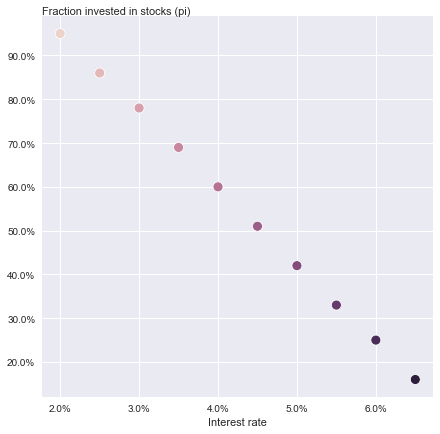

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(y=[round(cr.pi_arr(rate, 2, 0.02837, 0.076, 0.002)*100, 0) for rate in rfs], x=rfs*100, hue=rfs, legend=False, s=100)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: "{:}%".format(x)))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: "{}%".format(y)))
ax.set_ylabel('Fraction invested in stocks (pi)', loc='top', rotation=0, labelpad=-183)
ax.set_xlabel('Interest rate')
fig.savefig('Robustness/pi_cost_of_debt.png')
#sns.lineplot(y=[cr.pi_arr(rate, 2, 0.02837, 0.076, 0.002) for rate in rms], x=rms)

### Effect on performance

In [5]:
ports2 = cr.fetch_returns('garch', range(10000), YEARLY_RM = 0.02)
ports3 = cr.fetch_returns('garch', range(10000), YEARLY_RF=0.02, YEARLY_RM=0.03)
ports4 = cr.fetch_returns('garch', range(10000), YEARLY_RF=0.02, YEARLY_RM=0.04)
ports5 = cr.fetch_returns('garch', range(10000), YEARLY_RF=0.02, YEARLY_RM=0.05)

### Dual phase

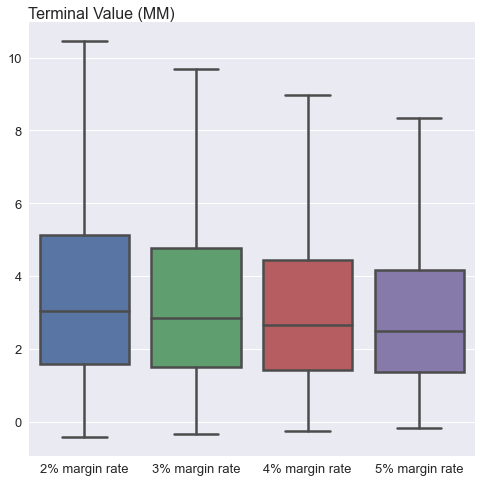

In [66]:
data=ports2.loc[:, ["dual_phase"]]
data.columns=['2% margin rate']
data["3% margin rate"]=ports3["dual_phase"]
data["4% margin rate"]=ports4["dual_phase"]
data["5% margin rate"]=ports5["dual_phase"]

x = data.loc[(slice(None), '2070-01-01'),:]
x = pd.melt(x)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(8,8))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("Terminal Value (MM)", loc='top', rotation=0, labelpad=-167)
ax.set_xlabel("")
f.savefig("Robustness/boxplot_higher_margin_rate_dual.png", bbox_inches = 'tight', pad_inches = 0.1)

### Single phase

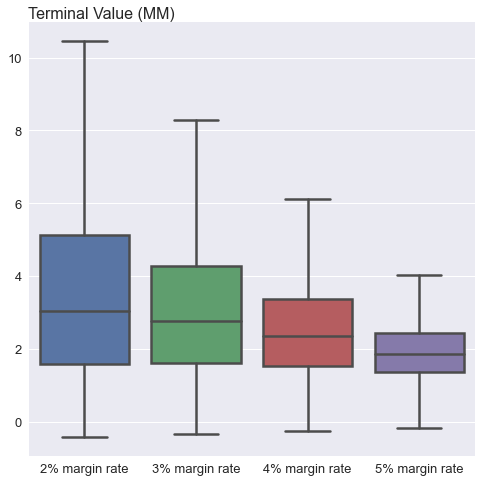

In [60]:
data=ports2.loc[:, ["single_phase"]]
data.columns=['2% margin rate']
data["3% margin rate"]=ports3["single_phase"]
data["4% margin rate"]=ports4["single_phase"]
data["5% margin rate"]=ports5["single_phase"]

x = data.loc[(slice(None), '2070-01-01'),:]
x = pd.melt(x)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(8,8))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("Terminal Value (MM)", loc='top', rotation=0, labelpad=-167)
ax.set_xlabel("")
#ax.set_yticklabels(style='plain', axis='y',useOffset=True)
f.savefig("Robustness/boxplot_higher_margin_rate_single.png", bbox_inches = 'tight', pad_inches = 0.1)

### Calculating sharpe ratio

In [12]:
sharpe2 = sharpe.calculate_sharpe(ports2)
sharpe3 = sharpe.calculate_sharpe(ports3)
sharpe4 = sharpe.calculate_sharpe(ports4)
sharpe5 = sharpe.calculate_sharpe(ports5)

In [98]:
mean_median_2 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe2.mean(), sharpe2.median())]
mean_median_3 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe3.mean(), sharpe3.median())]
mean_median_4 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe4.mean(), sharpe4.median())]
mean_median_5 = [f'{x:.3f}' + " " f'[{y:.3f}]' for x, y in zip(sharpe5.mean(), sharpe5.median())]

In [101]:
pd.DataFrame([mean_median_2, mean_median_3, mean_median_4, mean_median_5],
             columns=['Dual phase', 'Single phase', 'All stock', 'Life cycle'],
             index = pd.Index(['2% margin rate', '3% margin rate', '4% margin rate', '5% margin rate'])).to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n{} &     Dual phase &   Single phase &      All stock &     Life cycle \\\\\n\\midrule\n2\\% margin rate &  0.158 [0.210] &  0.158 [0.210] &  0.208 [0.208] &  0.193 [0.192] \\\\\n3\\% margin rate &  0.158 [0.211] &  0.153 [0.207] &  0.209 [0.208] &  0.193 [0.193] \\\\\n4\\% margin rate &  0.163 [0.211] &  0.151 [0.202] &  0.209 [0.208] &  0.193 [0.192] \\\\\n5\\% margin rate &  0.169 [0.213] &  0.143 [0.190] &  0.209 [0.208] &  0.193 [0.193] \\\\\n\\bottomrule\n\\end{tabular}\n'

#### Distribution of sharpe ratios

In [102]:
import sharpe

<AxesSubplot:ylabel='Density'>

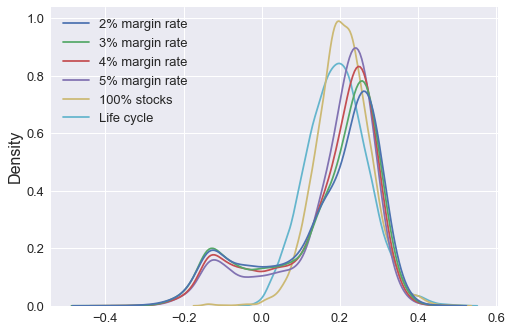

In [104]:
data=sharpe2.loc[:, ["Dual phase"]]
data.columns=['2% margin rate']
data["3% margin rate"]=sharpe3["Dual phase"]
data["4% margin rate"]=sharpe4["Dual phase"]
data["5% margin rate"]=sharpe5["Dual phase"]
data["100% stocks"]=sharpe5["100% stocks"]
data["Life cycle"]=sharpe5["Life cycle"]

sns.kdeplot(data = data)